In [7]:
import daal4py as dl
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
data = pd.read_csv('/home/mayur/Proj/Grocery/Grocery.csv',index_col=[0],header=[0,1], skipinitialspace=True)

grand_total = data.iloc[:,[4,9,14,19,24,29,34,39]].sum(axis=1,skipna=True)
gst_total = data.iloc[:,[3,8,13,18,23,28,33,38]].sum(axis=1,skipna=True)

data2 = pd.DataFrame()
data2['Grand Total'] = grand_total
data2['GST Total'] = gst_total

In [9]:
#data.values is used cause daal kmeans accept tables with numerical values only.

train_algo = dl.kmeans_init(4,method='randomDense').compute(data.values)

In [10]:
#number of clusters = 4
#number of max iterations = 2
algo = dl.kmeans(4,2,assignFlag=True).compute(data.values, train_algo.centroids)

In [11]:
data2['clusters'] = algo.assignments

In [12]:
data2

,Grand Total,GST Total,clusters
Grocery,,,
Rice,2504.0,0.00,1
Jowar,96.0,0.00,2
Split Green Gram,1061.5,0.00,1
Split Red Gram,905.0,0.00,3
Split Black Gram,232.0,0.00,2
Sugar,657.5,31.30,3
Wheat,900.0,0.00,3
Cooking Oil,2657.0,126.52,1
Tide,1515.0,0.00,1


/home/mayur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


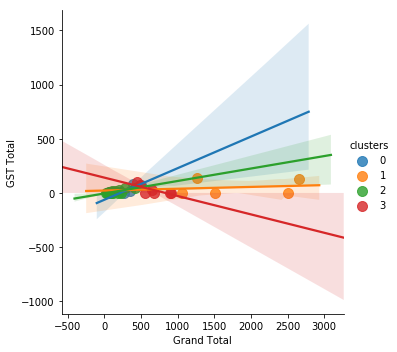

In [15]:
#algo.objectiveFunction
sns.lmplot('Grand Total','GST Total', data = data2 , hue = 'clusters',scatter_kws={'s':100})